In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix,accuracy_score

In [4]:
wine = pd.read_csv('D:\downloads\winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Input variables:

1. fixed acidity: most acids involved with wine or fixed or nonvolatile<br/>
2. volatile acidity: the amount of acetic acid in wine<br/>
3. citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines<br/>
4. residual sugar: the amount of sugar remaining after fermentation stops<br/>
5. chlorides: the amount of salt in the wine<br/>
6. free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion<br/>
7. total sulfur dioxide: amount of free and bound forms of S02<br/>
8. density: the density of water is close to that of water depending on the percent alcohol and sugar content<br/>
9. pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)<br/>
10. sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels<br/>
11. alcohol: the percent alcohol content of the wine<br/>

Output Variable:<br/>

quality: output variable (based on sensory data, score between 0 and 10)

Check if there are any null values

In [5]:
wine.isna().sum()



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Good we dont have any null data

In [6]:
#We will check how many duplicate rowes we have
wine.duplicated().sum()

240

In [7]:
#now we drop those rowes
wine.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Let us try to understand which values ​​will have the greatest impact on quality

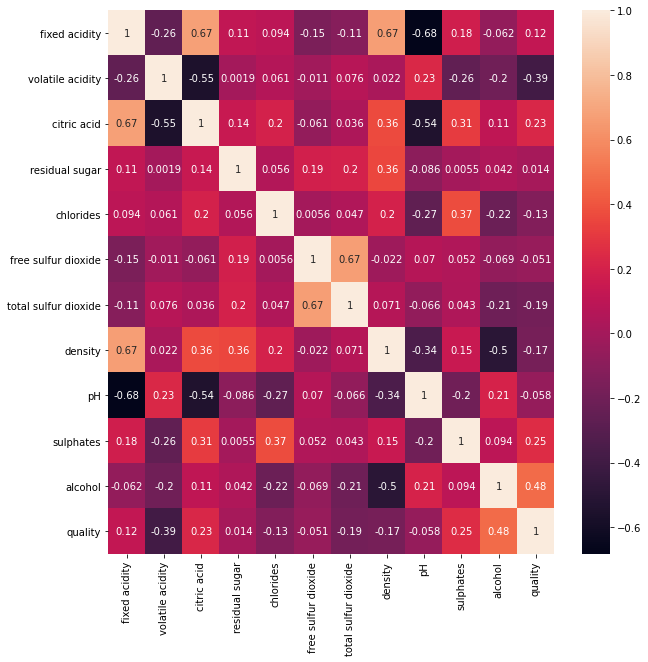

In [8]:
cormap = wine.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cormap, annot = True)

As can be seen from the heat map the values that have the maximum impact on quality are:<br/>
1. alcohol:0.48<br/>
2. sulphates:0.25<br/>
3. citric acid:0.23<br/>
4. volatile acidity -0.39 (nagtive impact)

In [9]:
#listing the unique values for the wine quality
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

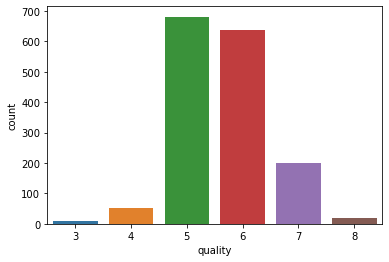

In [10]:
#taking a look at the quality ranges
sns.countplot(x='quality', data=wine)

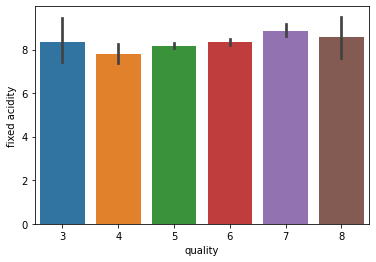

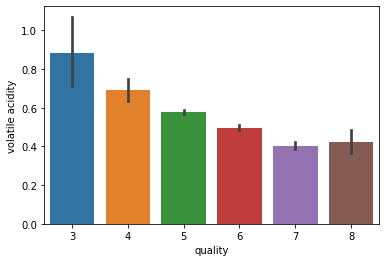

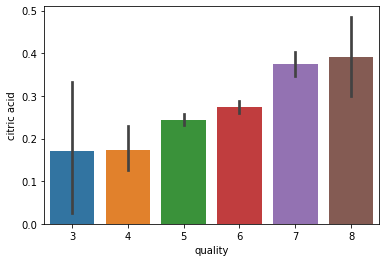

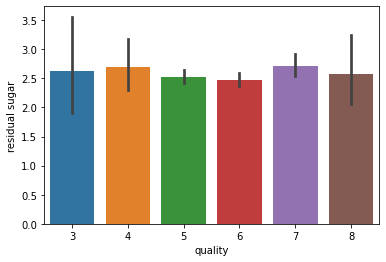

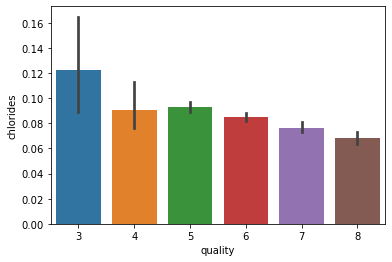

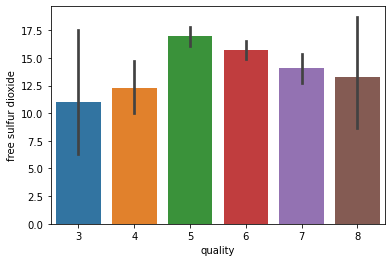

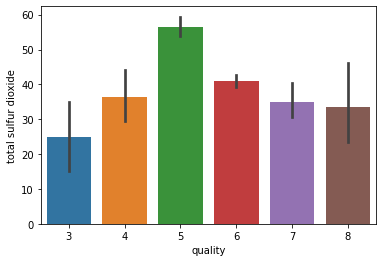

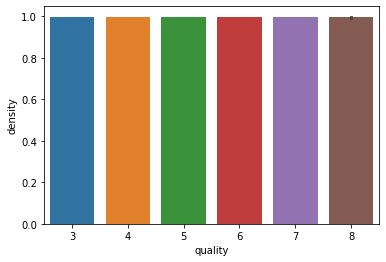

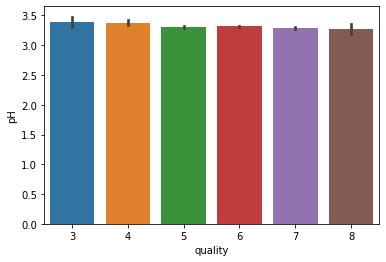

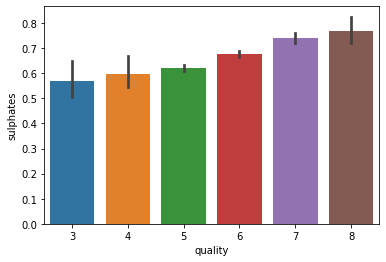

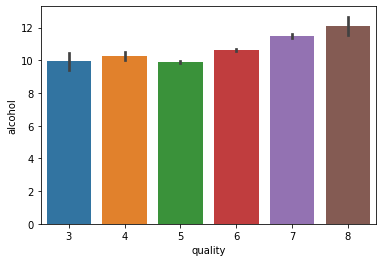

In [11]:
# generating charts that compare all of the variables 
# against quality.
#This will help us in seeing the impact of each component in the wine on the quality
for i in wine.columns:
    if i == "quality":
        break
    sns.barplot("quality",i,data=wine)
    plt.show()


splitting wine into good and bad groups, we're saying here that wines that have a quality score between
2-6.5 are bad quality, and wines that are above 6.5  are good

In [12]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
wine['wine_quality'] = pd.cut(x =wine['quality'], bins = bins, labels = labels)
wine['wine_quality'].value_counts()

bad     1382
good     217
Name: wine_quality, dtype: int64

We cant work with "good" and "bad" values so we convert them to numerical 

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
wine['wine_quality'] = labelencoder_y.fit_transform(wine['wine_quality'])

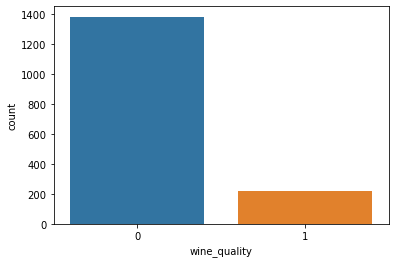

In [14]:
#taking a look at the quality ranges
sns.countplot(x='wine_quality', data=wine)

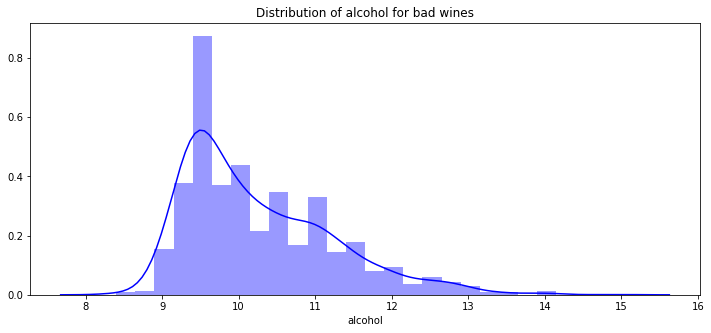

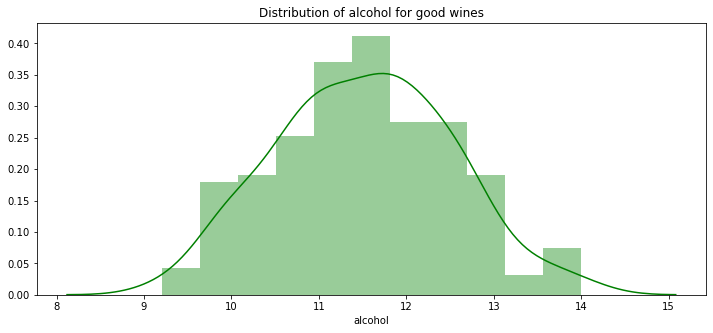

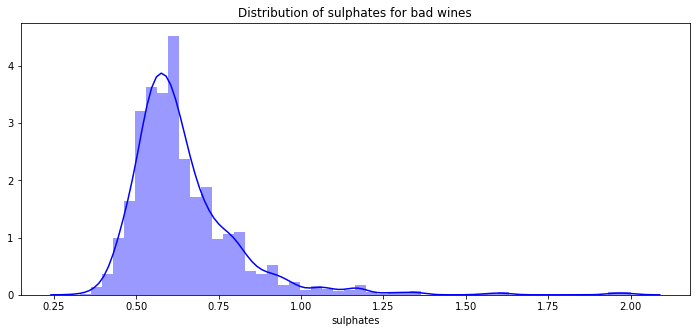

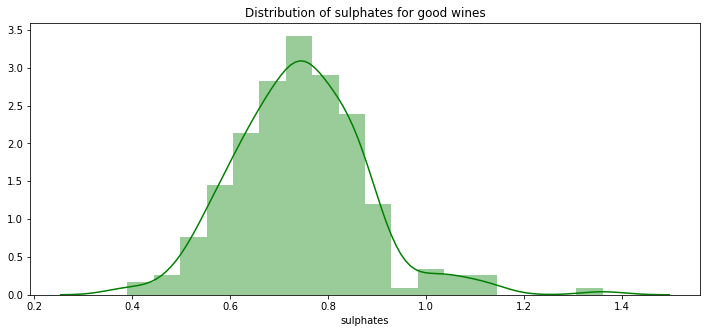

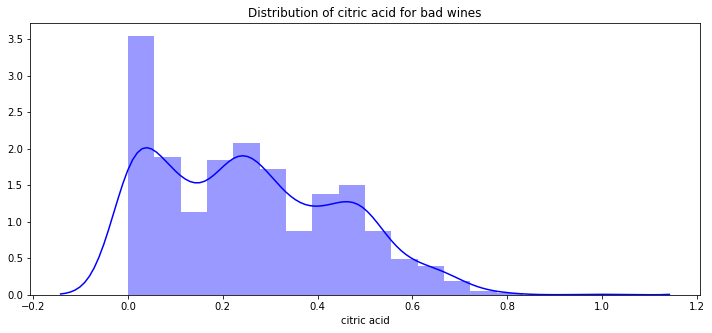

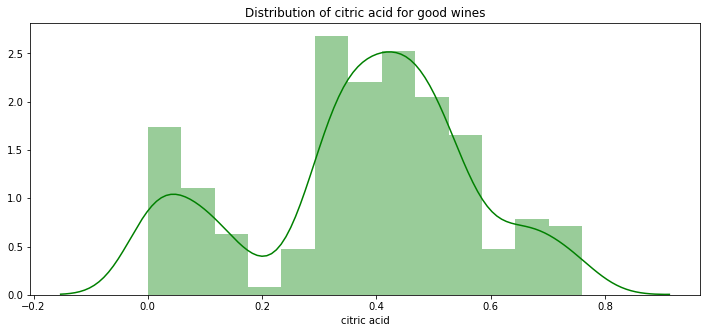

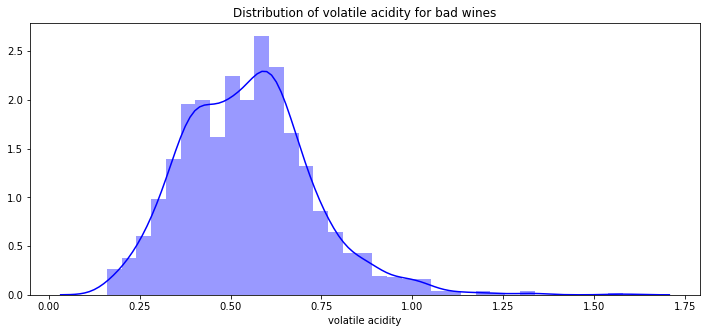

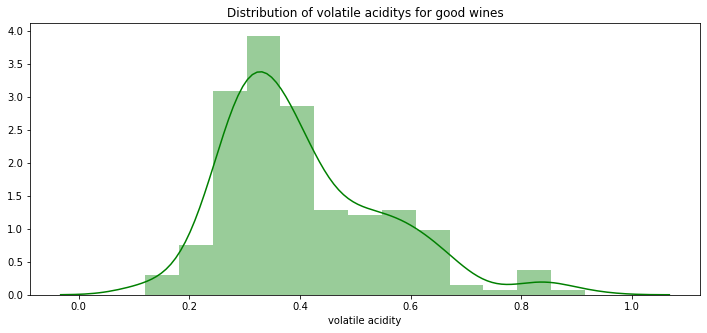

In [15]:
plt.figure(figsize=(12,5))
plt.title("Distribution of alcohol for bad wines")
ax = sns.distplot(wine[(wine.wine_quality == 0)]['alcohol'], color = 'b')
plt.figure(figsize=(12,5))
plt.title("Distribution of alcohol for good wines")
ax = sns.distplot(wine[(wine.wine_quality == 1)]['alcohol'], color = 'g')
plt.figure(figsize=(12,5))
plt.title("Distribution of sulphates for bad wines")
ax = sns.distplot(wine[(wine.wine_quality == 0)]['sulphates'], color = 'b')
plt.figure(figsize=(12,5))
plt.title("Distribution of sulphates for good wines")
ax = sns.distplot(wine[(wine.wine_quality == 1)]['sulphates'], color = 'g')
plt.figure(figsize=(12,5))
plt.title("Distribution of citric acid for bad wines")
ax = sns.distplot(wine[(wine.wine_quality == 0)]['citric acid'], color = 'b')
plt.figure(figsize=(12,5))
plt.title("Distribution of citric acid for good wines")
ax = sns.distplot(wine[(wine.wine_quality == 1)]['citric acid'], color = 'g')
plt.figure(figsize=(12,5))
plt.title("Distribution of volatile acidity for bad wines")
ax = sns.distplot(wine[(wine.wine_quality == 0)]['volatile acidity'], color = 'b')
plt.figure(figsize=(12,5))
plt.title("Distribution of volatile aciditys for good wines")
ax = sns.distplot(wine[(wine.wine_quality == 1)]['volatile acidity'], color = 'g')

In [16]:
x=wine[['wine_quality','alcohol']].groupby(['wine_quality']).describe()
x


alcohol                                                  
               count       mean       std  min   25%   50%   75%   max
wine_quality                                                          
0             1382.0  10.251037  0.969664  8.4   9.5  10.0  10.9  14.9
1              217.0  11.518049  0.998153  9.2  10.8  11.6  12.2  14.0

 as we can see the mean alcohol for good and bad wine its prety close maybe it willl hurt the model abllity to decide if wine is good because alcohol have big impct on quality as we saw in the heatmap and we can see that the mean alcohol for good wine is prety low 

In [40]:
x=wine[['wine_quality','alcohol']].loc[wine['wine_quality']==1].loc[wine['alcohol']>11]
x
y=wine[['wine_quality','alcohol']].loc[wine['wine_quality']==1].loc[wine['alcohol']<11.5]
y
z=wine[['wine_quality','alcohol']].loc[wine['wine_quality']==0].loc[wine['alcohol']>11.5]



,wine_quality,alcohol
0,1,13.00
1,1,13.00
2,1,12.20
3,1,12.20
4,1,12.20
...,...,...
276,0,12.60
277,0,12.60
278,0,13.60
279,0,13.50


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


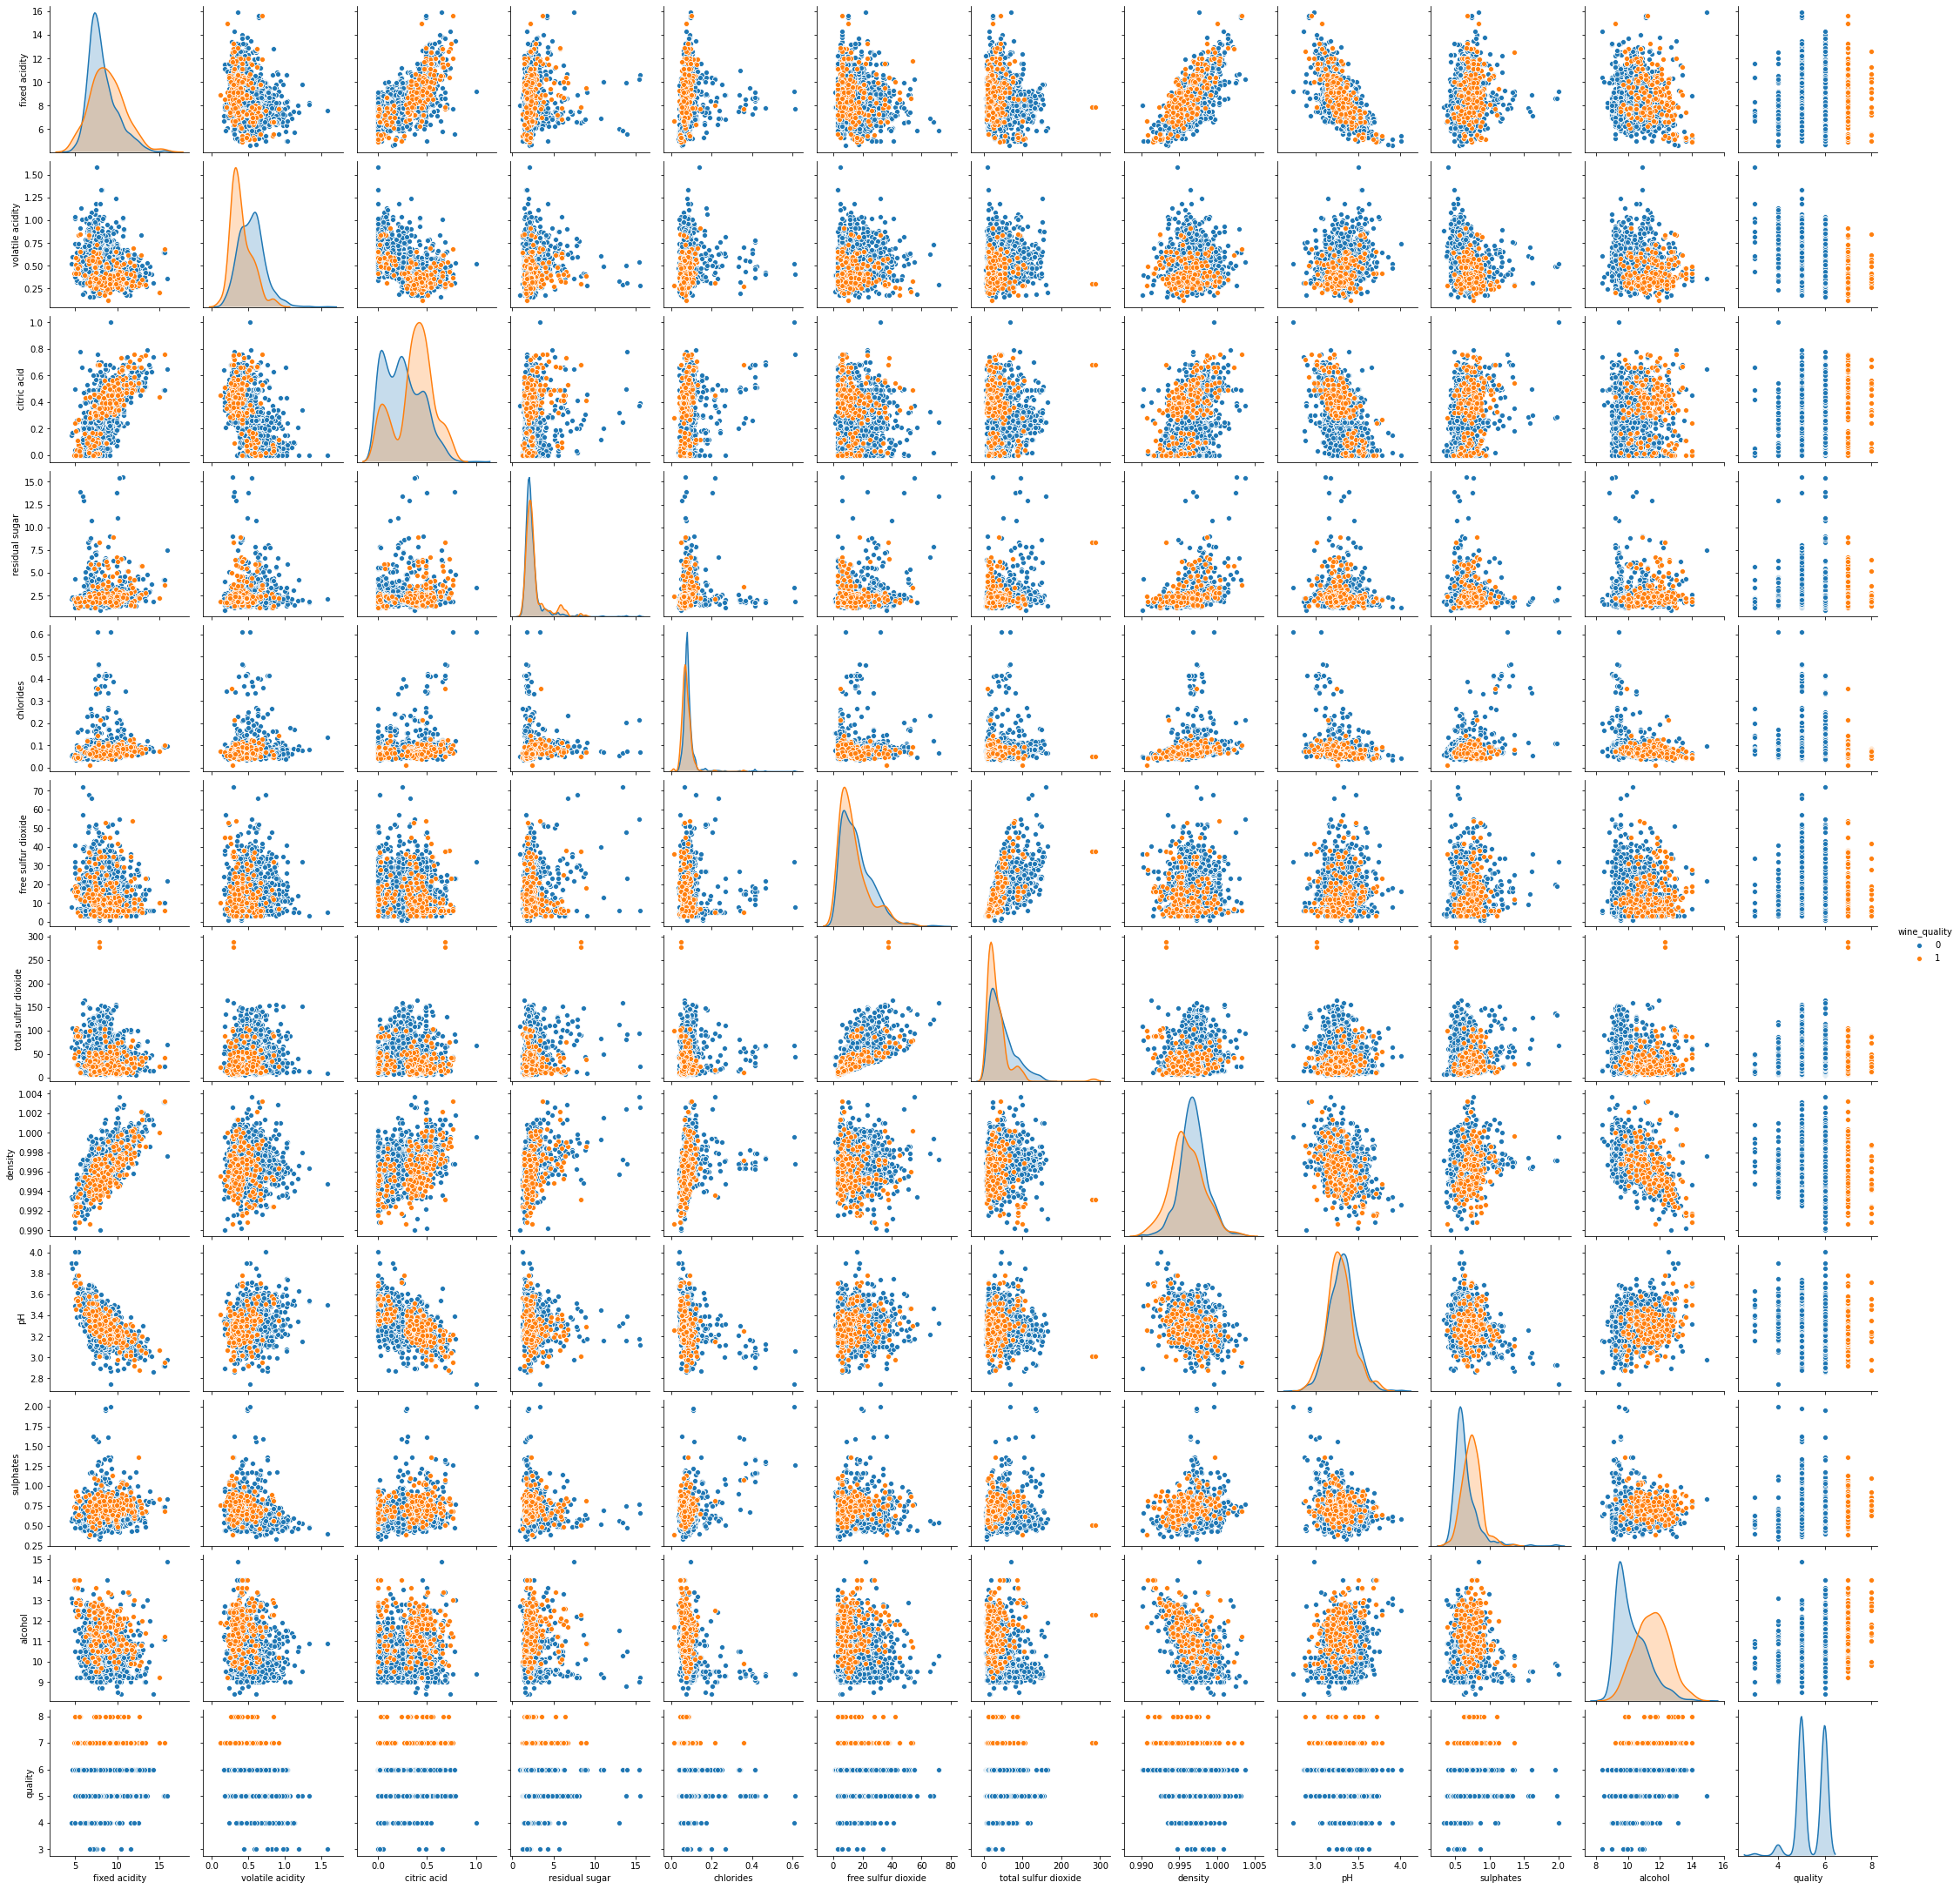

In [100]:
sns.pairplot(wine,hue='wine_quality')
plt.show()

In [185]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [26]:
X = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
'pH', 'sulphates', 'alcohol']].values
y = wine['wine_quality'].values


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =42)

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
#find the score of the dummy classifier if we filled to bet this score the model is not efctive
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
score = dummy.score(X_test, y_test)
score

0.853125

# KNN model

In [37]:
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))



0.9125


In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.875      0.85625    0.825      0.8        0.86875    0.8625
 0.78125    0.83125    0.8875     0.86792453]


In [39]:
k_range = list(range(1,50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
max_value = max(k_scores)
max_index = k_scores.index(max_value)+1
print("The optimal number of neighbors is {} and the score is {}".format(max_index , max_value))

The optimal number of neighbors is 45 and the score is 0.8667924528301887


Text(0, 0.5, 'Cross-Validated Accuracy')

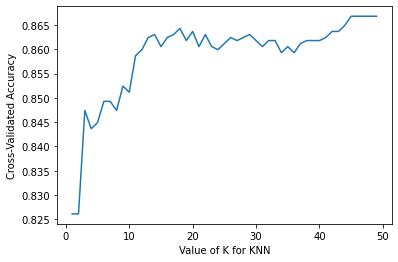

In [40]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [34]:
# define the parameter values that should be searched
k_range = list(range(1, 45))
weight_options = ['uniform', 'distance']
metric_options = ['euclidean','manhattan','minkowski']
param_grid = dict(n_neighbors=k_range, weights=weight_options,metric = metric_options)

In [36]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True,n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9077448326771653
{'metric': 'manhattan', 'n_neighbors': 38, 'weights': 'distance'}


In [42]:

final_knn_model = grid.best_estimator_
final_knn_prediction_on_test = final_knn_model.predict(X_test)

accuracy_score(y_test,final_knn_prediction_on_test)

0.890625

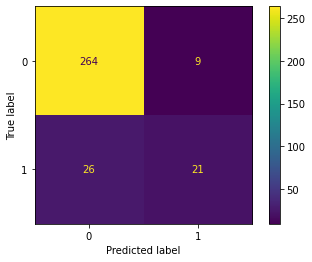

In [43]:
plot_confusion_matrix(grid.best_estimator_,X_test,y_test)
figsize=(20,20)
plt.show()  

In [44]:

print(classification_report(y_test, final_knn_prediction_on_test))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       273
           1       0.70      0.45      0.55        47

    accuracy                           0.89       320
   macro avg       0.81      0.71      0.74       320
weighted avg       0.88      0.89      0.88       320



# Random Forests  model


In [45]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [46]:

clf=RandomForestClassifier(n_estimators=100,criterion='gini')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [47]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.90625


In [48]:
tree_param_grid = [
    
    {
     'n_estimators': [100,200,400,600],
     'max_depth':[None,30,50,100],
     'max_features': ['auto','sqrt','log2'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2,3,5,7],
     'random_state':[0],
     'criterion' :['gini', 'entropy']  
        
    }
    
]

In [49]:

grid_search = GridSearchCV(
    RandomForestClassifier(),
    tree_param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1
)
grid_search.fit(X_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.907748161764706
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 0}


In [50]:
final_forest_model = grid_search.best_estimator_
final_forest_prediction_on_test = final_forest_model.predict(X_test)
accuracy_score(y_test,final_forest_prediction_on_test)

0.9125

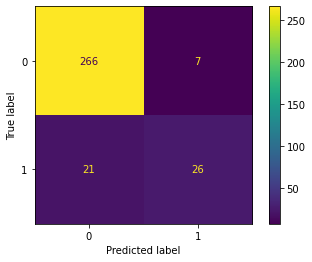

In [51]:
plot_confusion_matrix(grid_search.best_estimator_,X_test,y_test,)

In [52]:
print(classification_report(y_test, final_forest_prediction_on_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       273
           1       0.79      0.55      0.65        47

    accuracy                           0.91       320
   macro avg       0.86      0.76      0.80       320
weighted avg       0.91      0.91      0.91       320



#### Conclusion


You can see that the best results have been achieved with the help of the random forest model and it much better than the dummy model

The model is much less accurate in predicting good-quality wines we can have several reasons for this

One is that the data is unbalanced and most of the wines are of the bad kind

Secondly many of the good wines are with a relatively low percentage of alcohol and we have seen that this is something that greatly affects the quality so maybe that is why the model classified them as wines of the bad kind

### improvment

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.9)

In [73]:
pca.fit(X_train)

PCA(n_components=0.9)

In [74]:
pca.n_components_

7

In [75]:
train_pca = pca.transform(X_train)
testpca = pca.transform(X_test)

In [68]:

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [69]:
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
adac = AdaBoostClassifier(
final_forest_model, algorithm="SAMME.R", learning_rate=0.01)
adac.fit(train_pca , y_train)
scores = cross_val_score(adac, testpca, y_test, cv=5)
print("AdaBoost Classifier score: ", scores.mean())

AdaBoost Classifier score:  0.85625


In [70]:
kn = final_knn_model
rf = final_forest_model
gbrt = GradientBoostingClassifier()
xg =  XGBClassifier()

In [76]:
# pca stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('kn',kn ),
    ('rf',rf),
    ('gbrt',gbrt),
    ('xg',xg),
    ('adac',adac)]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(),cv =15
)

# Train stacked model
stack_model.fit(train_pca, y_train)

# Make predictions
y_train_pred = stack_model.predict(train_pca)
y_test_pred = stack_model.predict(testpca)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:24:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [78]:
# stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('kn',kn ),
    ('rf',rf),
    ('gbrt',gbrt),
    ('xg',xg),
    ('adac',adac)]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(),cv =15
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:32:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asaf Yekutiel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:32:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

Decrease by one percent with reduction of dimensions from 11 to 7
 An increase of about one percent without lowering dimensions